In [1]:
import pandas as pd
import numpy as np
import datetime
import re
from dateutil.parser import parse
import glob
import sys
import openpyxl as opx
import xlrd

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, TimeDistributed,GRU, Conv1D

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# 데이터 추출

In [2]:
# kepsh2 2021-04-20 오후 5:42:56 까지의 엑셀 데이터 추출

files = glob.glob('./kepsh2/1/*.xls')

all_data1 = pd.DataFrame()
for f in files:
    data = pd.read_csv(f, encoding='euc-kr', engine= 'python',  header=0, sep='\t+')
    
    df = pd.DataFrame(data)
    
    all_data1 = all_data1.append(df, ignore_index=True)
    print(f, all_data1.shape)
all_data1


./kepsh2/1\2020-06-11 12시 08분 35초.xls (94, 21)
./kepsh2/1\2020-06-11 13시 44분 04초.xls (97, 21)
./kepsh2/1\2020-06-11 13시 45분 57초.xls (101, 21)
./kepsh2/1\2020-06-11 13시 56분 03초.xls (103, 21)
./kepsh2/1\2020-06-11 13시 57분 20초.xls (103, 21)
./kepsh2/1\2020-06-11 13시 58분 23초.xls (705, 21)
./kepsh2/1\2020-06-12 00시 00분 07초.xls (2145, 21)
./kepsh2/1\2020-06-13 00시 00분 07초.xls (3585, 21)
./kepsh2/1\2020-06-14 00시 00분 06초.xls (5025, 21)
./kepsh2/1\2020-06-15 00시 00분 06초.xls (6465, 21)
./kepsh2/1\2020-06-16 00시 00분 05초.xls (7905, 21)
./kepsh2/1\2020-06-17 00시 00분 05초.xls (8566, 21)
./kepsh2/1\Z2_2020-06-17 11시 03분 47초.xls (8567, 21)
./kepsh2/1\Z2_2020-06-17 11시 04분 04초.xls (8620, 21)
./kepsh2/1\Z2_2020-06-17 11시 56분 28초.xls (9344, 21)
./kepsh2/1\Z2_2020-06-18 00시 00분 03초.xls (10784, 21)
./kepsh2/1\Z2_2020-06-19 00시 00분 03초.xls (12224, 21)
./kepsh2/1\Z2_2020-06-20 00시 00분 03초.xls (13664, 21)
./kepsh2/1\Z2_2020-06-21 00시 00분 02초.xls (15104, 21)
./kepsh2/1\Z2_2020-06-22 00시 00분 02초.xls (16544, 21)

./kepsh2/1\Z2_2020-12-01 00시 00분 38초.xls (176987, 21)
./kepsh2/1\Z2_2020-12-02 00시 00분 37초.xls (178427, 21)
./kepsh2/1\Z2_2020-12-03 00시 00분 35초.xls (179438, 21)
./kepsh2/1\Z2_2020-12-03 16시 51분 16초.xls (179868, 21)
./kepsh2/1\Z2_2020-12-04 00시 00분 34초.xls (181308, 21)
./kepsh2/1\Z2_2020-12-05 00시 00분 33초.xls (182748, 21)
./kepsh2/1\Z2_2020-12-06 00시 00분 32초.xls (184188, 21)
./kepsh2/1\Z2_2020-12-07 00시 00분 30초.xls (185628, 21)
./kepsh2/1\Z2_2020-12-08 00시 00분 29초.xls (187068, 21)
./kepsh2/1\Z2_2020-12-09 00시 00분 28초.xls (187892, 21)
./kepsh2/1\Z2_2020-12-09 13시 44분 42초.xls (188508, 21)
./kepsh2/1\Z2_2020-12-10 00시 00분 27초.xls (189948, 21)
./kepsh2/1\Z2_2020-12-11 00시 00분 25초.xls (191388, 21)
./kepsh2/1\Z2_2020-12-12 00시 00분 24초.xls (192828, 21)
./kepsh2/1\Z2_2020-12-13 00시 00분 23초.xls (194268, 21)
./kepsh2/1\Z2_2020-12-14 00시 00분 22초.xls (195708, 21)
./kepsh2/1\Z2_2020-12-15 00시 00분 20초.xls (197148, 21)
./kepsh2/1\Z2_2020-12-16 00시 00분 19초.xls (198588, 21)
./kepsh2/1\Z2_2020-12-17 00시

./kepsh2/1\Z2_2021-03-02 17시 42분 50초.xls (306763, 49)
./kepsh2/1\Z2_2021-03-02 17시 44분 41초.xls (306764, 49)
./kepsh2/1\Z2_2021-03-02 17시 45분 45초.xls (306766, 49)
./kepsh2/1\Z2_2021-03-02 17시 47분 14초.xls (306775, 49)
./kepsh2/1\Z2_2021-03-02 17시 55분 56초.xls (306777, 49)
./kepsh2/1\Z2_2021-03-02 17시 59분 04초.xls (306779, 49)
./kepsh2/1\Z2_2021-03-02 18시 02분 36초.xls (306813, 49)
./kepsh2/1\Z2_2021-03-02 18시 36분 04초.xls (307137, 49)
./kepsh2/1\Z2_2021-03-03 00시 00분 02초.xls (308029, 49)
./kepsh2/1\Z2_2021-03-03 14시 52분 57초.xls (308046, 49)
./kepsh2/1\Z2_2021-03-03 15시 37분 41초.xls (308047, 49)
./kepsh2/1\Z2_2021-03-03 15시 38분 48초.xls (308549, 49)
./kepsh2/1\Z2_2021-03-04 00시 00분 06초.xls (309989, 49)
./kepsh2/1\Z2_2021-03-05 00시 00분 06초.xls (311429, 49)
./kepsh2/1\Z2_2021-03-06 00시 00분 06초.xls (312869, 49)
./kepsh2/1\Z2_2021-03-07 00시 00분 04초.xls (314309, 49)
./kepsh2/1\Z2_2021-03-08 00시 00분 02초.xls (314983, 49)
./kepsh2/1\Z2_2021-03-08 11시 15분 18초.xls (315748, 49)
./kepsh2/1\Z2_2021-03-09 00시

,Time,1.Z2_메인(W),1.Z2_메인(kWh),2.Z2_조명(W),2.Z2_조명(kWh),3.Z2_히트(W),3.Z2_히트(kWh),4.Z2_태양열(W),4.Z2_태양열(kWh),5.Z2_전열(W),...,Z2_3AC(A),Z2_37AC(kW),Z2_3(kWh),Z2_4DC(V),Z2_4DC(A),Z2_4DC(kW),Z2_4AC(V),Z2_4AC(A),Z2_4AC(kW),Z2_4(kWh)
0,2020-06-11 오후 12:08:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-06-11 오후 12:09:06,1085.0,401.6,407.0,214.1,10.0,11.6,69.0,34.7,568.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-06-11 오후 12:10:06,1104.0,401.6,406.0,214.2,9.0,11.6,70.0,34.7,588.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-06-11 오후 12:11:06,1102.0,401.6,406.0,214.2,9.0,11.6,70.0,34.7,588.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-06-11 오후 12:12:06,1105.0,401.7,406.0,214.2,9.0,11.6,69.0,34.8,589.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372573,2021-04-20 오후 5:38:56,771.0,7764.5,408.0,557.6,10.0,4854.3,74.0,830.4,0.0,...,0.9,0.2,1088.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
372574,2021-04-20 오후 5:39:56,768.0,7764.5,407.0,557.6,10.0,4854.3,74.0,830.4,0.0,...,0.9,0.2,1088.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
372575,2021-04-20 오후 5:40:56,768.0,7764.5,406.0,557.6,10.0,4854.3,73.0,830.4,0.0,...,0.8,0.1,1088.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
372576,2021-04-20 오후 5:41:56,770.0,7764.5,407.0,557.6,10.0,4854.3,74.0,830.4,0.0,...,0.9,0.1,1088.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0


In [ ]:
# kepsh2 2021-04-20 오후 5:42:56 이후데이터 concat한 것 수작업으로 정리한 데이터 로딩 (구분자가 인식 안됐음, 이유불명)


files = glob.glob('./kepsh2/3/*.csv')

all_data2 = pd.DataFrame()
for f in files:
    data = pd.read_csv(f, encoding='euc-kr', engine= 'python',  header=0, sep=',')
    
    df = pd.DataFrame(data)
    
    all_data2 = all_data2.append(df, ignore_index=True)
    print(f, all_data2.shape)
all_data2


In [ ]:
# Time 컬럼에서 오전, 오후 한글은 pd.to_date 적용 불가 AM, PM으로 각각 변경

all_data1['Time'] = all_data1['Time'].replace({'오전': 'AM', '오후':'PM'}, regex=True)

In [ ]:
# all_data는 포맷변경 적용 필요

all_data1['Time']= pd.to_datetime(all_data1['Time'], format = "%Y-%m-%d %p %I:%M:%S")
all_data1.head()

In [ ]:
# all_data2는 포맷변경 없이 바로 적용 가능

all_data2['Time']= pd.to_datetime(all_data2['Time'])
all_data2.info()

In [ ]:
all_data2.head()

In [ ]:
# Time 컬럼 포맷 변경 후 다시 concat
all_data3 = pd.concat([all_data1, all_data2])
all_data3.info()

In [ ]:
# Reindexing
all_data3.reset_index(drop=True, inplace=True)

In [ ]:
# 데이터프레임 저장
all_data3.to_csv('./kepsh2_concat.csv', encoding='euc=kr')

# 합쳐진 데이터 로드

In [10]:
df = pd.read_csv('./kepsh2_concat.csv', encoding='euc-kr', parse_dates = True, index_col='Time')

In [11]:
# 쓸데없는 열 삭제
df.drop(['Unnamed: 0', 'Unnamed: 104'], inplace = True, axis =1 )
df.head()

,1.Z2_메인(W),1.Z2_메인(kWh),2.Z2_조명(W),2.Z2_조명(kWh),3.Z2_히트(W),3.Z2_히트(kWh),4.Z2_태양열(W),4.Z2_태양열(kWh),5.Z2_전열(W),5.Z2_전열(kWh),...,KP2_4AC(V),KP2_4AC(A),KP2_4AC(kW),KP2_4(kWh),4.KP2_태양열(W),ZKP2_1DC(kW),수직일사,경사일사,수직면일사량(W/m2),경사면일사량(W/m2)
Time,,,,,,,,,,,,,,,,,,,,,
2020-06-11 12:08:35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-11 12:09:06,1085.0,401.6,407.0,214.1,10.0,11.6,69.0,34.7,568.0,312.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-11 12:10:06,1104.0,401.6,406.0,214.2,9.0,11.6,70.0,34.7,588.0,312.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-11 12:11:06,1102.0,401.6,406.0,214.2,9.0,11.6,70.0,34.7,588.0,312.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-11 12:12:06,1105.0,401.7,406.0,214.2,9.0,11.6,69.0,34.8,589.0,312.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df2=pd.DataFrame()
df2['PV_kepsh2_DT(W)'] = df['7.BIPV(W)']

In [16]:
# 결측치제거
df3 = df2.dropna(axis=0)

In [18]:
# BIPV값만 저장
df3.to_csv('./211105_kepsh2_PV_DT.csv', encoding='euc=kr')

# 데이터 분석

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


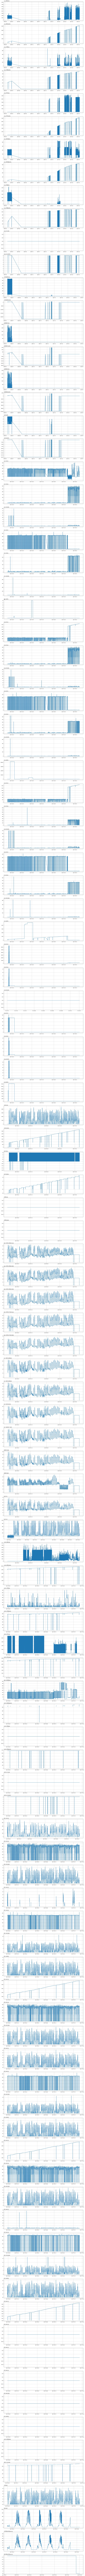

In [12]:
fig, ax = plt.subplots(figsize=(18,600))

for i in range(len(df.columns)):
    plt.subplot(len(df.columns), 1, i+1)
    name = df.columns[i]
    plt.plot(df[name])    
    plt.title(name, loc = 'left', pad=5)   
    plt.yticks()
    plt.grid(True)
plt.show()
fig.tight_layout()